In [55]:
import pandas as pd
import copy
import matplotlib.pyplot as plt

In [51]:
def pivot_col(df, key, col):
    dfs = []
    vs  = []
    for v in df[col].unique():
        vs.append(v)
        tdf = df[df[col]==v]
        tdf = tdf[[i for i in tdf.columns if i != col]]
        tdf.columns = [i+'_'+v for i in tdf.columns.tolist()]
        dfs.append(tdf)
        #display(tdf)
    df_out = dfs[0]
    df_out = df_out.rename(columns={str(key+'_'+vs[0]): key})
    for idx, tdf in enumerate(dfs):
        if idx > 0:
            tdf = tdf.rename(columns={key+'_'+vs[idx]: key})
            df_out = df_out.merge(tdf, how='inner', on=key)
    return df_out

In [52]:
df_13980   = pd.read_parquet('./data/home_encounters_jericho/export_home_encounters_a13980/part-00000-tid-3465865264199653446-a120bc38-cfd6-4533-987a-b5b1f4540b1e-23458-1-c000.snappy.parquet')
df_17420_0 = pd.read_parquet('./data/home_encounters_jericho/export_home_encounters_a17420/part-00000-tid-6409248012305275463-ecb62761-a41c-4758-985d-fdad59d8332e-19259-1-c000.snappy.parquet')
df_17420_1 = pd.read_parquet('./data/home_encounters_jericho/export_home_encounters_a17420/part-00001-tid-6409248012305275463-ecb62761-a41c-4758-985d-fdad59d8332e-19258-1-c000.snappy.parquet')
df_17420   = pd.concat([df_17420_0, df_17420_1], axis=0)
df_22420   = pd.read_parquet('./data/home_encounters_jericho/export_home_encounters_a22420/part-00000-tid-3953021927607486463-3c107bf6-b5aa-4cf5-8ea9-0365252ee4f3-30617-1-c000.snappy.parquet')
df_28700   = pd.read_parquet('./data/home_encounters_jericho/export_home_encounters_a28700/part-00000-tid-7638614577380359351-ed68d722-d1f8-4ea5-8d44-659f9780a9dc-27863-1-c000.snappy.parquet')
df_13980   = pivot_col(df_13980, 'dayofyear', 'encounter_type')
df_17420   = pivot_col(df_17420, 'dayofyear', 'encounter_type')
df_22420   = pivot_col(df_22420, 'dayofyear', 'encounter_type')
df_28700   = pivot_col(df_28700, 'dayofyear', 'encounter_type')
del df_17420_0, df_17420_1

In [53]:
df_13980 

dayofyear  n_encounters_home  n_active_users_in_cbsa_home  \
0           45              18383                         5241   
1           86               9225                         4035   
2          198               8261                         3882   
3          208               7805                         3659   
4          238              11971                         4574   
..         ...                ...                          ...   
239        180               8977                         3690   
240         83              12036                         4087   
241        154               8928                         3795   
242         55              34595                         4880   
243          7               9515                         3324   

     n_active_users_in_state_home  n_encounters_coresident  \
0                          209714                   346084   
1                          212102                   241908   
2                          190576                   151478   
3                          178766                   128898   
4                          174898                   149735   
..                            ...                      ...   
239                        198472                   151594   
240                        211979                   229039   
241                        206244                   195672   
242                        209401                   596511   
243                        181625                   145715   

     n_active_users_in_cbsa_coresident  n_active_users_in_state_coresident  
0                                 5241                              209714  
1                                 4035                              212102  
2                                 3882                              190576  
3                                 3659                              178766  
4                                 4574                              174898  
..                                 ...                                 ...  
239                               3690                              198472  
240                               4087                              211979  
241                               3795                              206244  
242                               4880                              209401  
243                               3324                              181625  

[244 rows x 7 columns]

In [54]:
def encounter_ratios(df):
    df['ncr_enc_ratio'] = df['n_encounters_home'] / df['n_active_users_in_cbsa_home']
    df['cr_enc_ratio'] = df['n_encounters_coresident'] / df['n_active_users_in_cbsa_home']
    df['ratio_ratio'] = df['ncr_enc_ratio'] / df['cr_enc_ratio']
    return df

df_13980_ratios = encounter_ratios(df_13980)
df_13980

dayofyear  n_encounters_home  n_active_users_in_cbsa_home  \
0           45              18383                         5241   
1           86               9225                         4035   
2          198               8261                         3882   
3          208               7805                         3659   
4          238              11971                         4574   
..         ...                ...                          ...   
239        180               8977                         3690   
240         83              12036                         4087   
241        154               8928                         3795   
242         55              34595                         4880   
243          7               9515                         3324   

     n_active_users_in_state_home  n_encounters_coresident  \
0                          209714                   346084   
1                          212102                   241908   
2                          190576                   151478   
3                          178766                   128898   
4                          174898                   149735   
..                            ...                      ...   
239                        198472                   151594   
240                        211979                   229039   
241                        206244                   195672   
242                        209401                   596511   
243                        181625                   145715   

     n_active_users_in_cbsa_coresident  n_active_users_in_state_coresident  \
0                                 5241                              209714   
1                                 4035                              212102   
2                                 3882                              190576   
3                                 3659                              178766   
4                                 4574                              174898   
..                                 ...                                 ...   
239                               3690                              198472   
240                               4087                              211979   
241                               3795                              206244   
242                               4880                              209401   
243                               3324                              181625   

     ncr_enc_ratio  cr_enc_ratio  ratio_ratio  
0         3.507537     66.033963     0.053117  
1         2.286245     59.952416     0.038134  
2         2.128027     39.020608     0.054536  
3         2.133096     35.227658     0.060552  
4         2.617184     32.736117     0.079948  
..             ...           ...          ...  
239       2.432791     41.082385     0.059217  
240       2.944947     56.040861     0.052550  
241       2.352569     51.560474     0.045627  
242       7.089139    122.235861     0.057996  
243       2.862515     43.837244     0.065299  

[244 rows x 10 columns]

(array([150.,  55.,  23.,   5.,   3.,   0.,   0.,   2.,   2.,   4.]),
 array([0.03433867, 0.05674821, 0.07915775, 0.10156728, 0.12397682,
        0.14638636, 0.1687959 , 0.19120544, 0.21361498, 0.23602451,
        0.25843405]),
 <BarContainer object of 10 artists>)

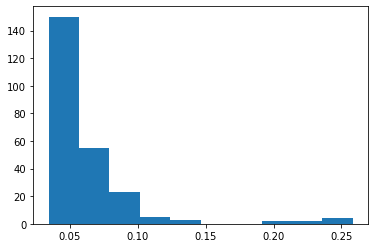

In [57]:
plt.hist(df_13980_ratios['ratio_ratio'])